In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [2]:
from google.colab import files

#Upload files dataset
uploaded = files.upload()

# List the uploaded files
for filename in uploaded.keys():
    print(f'ulasan_aplikasi.csv "{filename}"')

Saving ulasan_aplikasi.csv to ulasan_aplikasi.csv
ulasan_aplikasi.csv "ulasan_aplikasi.csv"


In [3]:
# Membuat DataFrame dari hasil scrapreview
app_reviews_df = pd.read_csv('ulasan_aplikasi.csv')

In [4]:
# Menampilkan informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              41557 non-null  object
 1   userName              41557 non-null  object
 2   userImage             41557 non-null  object
 3   content               41557 non-null  object
 4   score                 41557 non-null  int64 
 5   thumbsUpCount         41557 non-null  int64 
 6   reviewCreatedVersion  37670 non-null  object
 7   at                    41557 non-null  object
 8   replyContent          11433 non-null  object
 9   repliedAt             11433 non-null  object
 10  appVersion            37670 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.5+ MB


In [5]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10476 entries, 20 to 40857
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10476 non-null  object
 1   userName              10476 non-null  object
 2   userImage             10476 non-null  object
 3   content               10476 non-null  object
 4   score                 10476 non-null  int64 
 5   thumbsUpCount         10476 non-null  int64 
 6   reviewCreatedVersion  10476 non-null  object
 7   at                    10476 non-null  object
 8   replyContent          10476 non-null  object
 9   repliedAt             10476 non-null  object
 10  appVersion            10476 non-null  object
dtypes: int64(2), object(9)
memory usage: 982.1+ KB


In [6]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10476 entries, 20 to 40857
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10476 non-null  object
 1   userName              10476 non-null  object
 2   userImage             10476 non-null  object
 3   content               10476 non-null  object
 4   score                 10476 non-null  int64 
 5   thumbsUpCount         10476 non-null  int64 
 6   reviewCreatedVersion  10476 non-null  object
 7   at                    10476 non-null  object
 8   replyContent          10476 non-null  object
 9   repliedAt             10476 non-null  object
 10  appVersion            10476 non-null  object
dtypes: int64(2), object(9)
memory usage: 982.1+ KB


## Preprocessing
    

1.   cleaningText(text)
2.   casefoldingText(text)
3.   tokenizingText(text)
4.   filteringText(text)
5.   stemmingText(text)
6.   toSentence(list_words)



In [7]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [8]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [9]:
clean_df

reviewId                 userName  \
20     9576c37a-2503-4bc1-84b2-ec16e0ee878d          Pengguna Google   
56     2744a112-0e5f-4852-9afd-9ae268e40c7b          Pengguna Google   
130    a2b1fda0-b0fd-491c-9e18-b05d4067750c          Pengguna Google   
141    7b19bb82-95d0-4e2f-8f16-564af1060d75          Pengguna Google   
156    09f6370d-68b3-4bb9-beff-2a9b2fa997cc          Pengguna Google   
...                                     ...                      ...   
40852  d5f5db72-7949-490b-92b6-3be713f58c1e         Iklan Kota Batam   
40853  3c2adf77-77a1-46ff-8ad0-039c06d9955e           Febri Setiawan   
40854  a544355d-7028-42e8-b1ce-f7fc391124f7           ompong bewok77   
40856  c860e4e0-496b-434e-ad2b-ee722c55bc1a  M Ihsan Eriantama Putra   
40857  3997d6ae-4175-4236-81b4-871721d6dc55           Jaya Logistics   

                                               userImage  \
20     https://play-lh.googleusercontent.com/EGemoI2N...   
56     https://play-lh.googleusercontent.com/EGemoI2N...   
130    https://play-lh.googleusercontent.com/EGemoI2N...   
141    https://play-lh.googleusercontent.com/EGemoI2N...   
156    https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
40852  https://play-lh.googleusercontent.com/a-/ALV-U...   
40853  https://play-lh.googleusercontent.com/a-/ALV-U...   
40854  https://play-lh.googleusercontent.com/a-/ALV-U...   
40856  https://play-lh.googleusercontent.com/a-/ALV-U...   
40857  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
20     Kendalanya masih sama saat kurir pos Indonesia...      4   
56     Aplikasi belum sempurna dan perlu disempurnaka...      2   
130    Saya tracking prosesnya di samsat cepat, cuma ...      4   
141    .sekarang aplikasi iniSDH bisa digunakan untuk...      5   
156    Sangat bagus, melayani yang lokasi jauh atau w...      5   
...                                                  ...    ...   
40852                                             Mantap      5   
40853                                              Bagus      5   
40854                                         Bermanfaat      5   
40856                                  ngemudahin banget      5   
40857                                            Ok seep      5   

       thumbsUpCount reviewCreatedVersion                   at  \
20                87                1.5.7  2024-07-19 12:26:05   
56                 6                1.5.7  2024-07-24 13:26:42   
130                0                1.5.7  2024-05-08 20:50:28   
141                5                1.5.7  2024-07-22 06:05:32   
156               94                1.5.7  2024-03-21 02:03:03   
...              ...                  ...                  ...   
40852              0                1.2.4  2021-07-31 00:29:14   
40853              0                1.2.4  2021-08-09 01:58:18   
40854              0                1.2.4  2021-08-05 12:24:13   
40856              0                1.2.4  2021-08-26 08:09:25   
40857              0                1.2.4  2021-08-11 02:49:31   

                                            replyContent            repliedAt  \
20     Hai Abdul, kami mohon maaf atas ketidaknyamana...  2021-08-10 10:59:45   
56     Hai, kami mohon maaf atas ketidaknyamanannya. ...  2024-01-03 08:51:22   
130    Hai, terima kasih banyak atas ulasannya :) Ter...  2022-03-14 02:28:32   
141    Halo kak, terima kasih atas ulasannya. Terus g...  2023-11-15 08:11:09   
156    Hai kak, terima kasih atas ulasan positifnya. ...  2024-03-21 06:32:36   
...                                                  ...                  ...   
40852  Hai, terima kasih atas ulasannya :) Terus guna...  2021-08-03 10:41:35   
40853  Hai Febri, terima kasih atas ulasannya :) Teru...  2021-08-10 11:03:05   
40854  Hai, terima kasih atas ulasannya :) Terus guna...  2021-08-04 11:46:49   
40856  Hai, terima kasih atas ulasannya :

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download the Punkt sentence tokenizer models

# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [11]:
clean_df

reviewId                 userName  \
20     9576c37a-2503-4bc1-84b2-ec16e0ee878d          Pengguna Google   
56     2744a112-0e5f-4852-9afd-9ae268e40c7b          Pengguna Google   
130    a2b1fda0-b0fd-491c-9e18-b05d4067750c          Pengguna Google   
141    7b19bb82-95d0-4e2f-8f16-564af1060d75          Pengguna Google   
156    09f6370d-68b3-4bb9-beff-2a9b2fa997cc          Pengguna Google   
...                                     ...                      ...   
40852  d5f5db72-7949-490b-92b6-3be713f58c1e         Iklan Kota Batam   
40853  3c2adf77-77a1-46ff-8ad0-039c06d9955e           Febri Setiawan   
40854  a544355d-7028-42e8-b1ce-f7fc391124f7           ompong bewok77   
40856  c860e4e0-496b-434e-ad2b-ee722c55bc1a  M Ihsan Eriantama Putra   
40857  3997d6ae-4175-4236-81b4-871721d6dc55           Jaya Logistics   

                                               userImage  \
20     https://play-lh.googleusercontent.com/EGemoI2N...   
56     https://play-lh.googleusercontent.com/EGemoI2N...   
130    https://play-lh.googleusercontent.com/EGemoI2N...   
141    https://play-lh.googleusercontent.com/EGemoI2N...   
156    https://play-lh.googleusercontent.com/EGemoI2N...   
...                                                  ...   
40852  https://play-lh.googleusercontent.com/a-/ALV-U...   
40853  https://play-lh.googleusercontent.com/a-/ALV-U...   
40854  https://play-lh.googleusercontent.com/a-/ALV-U...   
40856  https://play-lh.googleusercontent.com/a-/ALV-U...   
40857  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                 content  score  \
20     Kendalanya masih sama saat kurir pos Indonesia...      4   
56     Aplikasi belum sempurna dan perlu disempurnaka...      2   
130    Saya tracking prosesnya di samsat cepat, cuma ...      4   
141    .sekarang aplikasi iniSDH bisa digunakan untuk...      5   
156    Sangat bagus, melayani yang lokasi jauh atau w...      5   
...                                                  ...    ...   
40852                                             Mantap      5   
40853                                              Bagus      5   
40854                                         Bermanfaat      5   
40856                                  ngemudahin banget      5   
40857                                            Ok seep      5   

       thumbsUpCount reviewCreatedVersion                   at  \
20                87                1.5.7  2024-07-19 12:26:05   
56                 6                1.5.7  2024-07-24 13:26:42   
130                0                1.5.7  2024-05-08 20:50:28   
141                5                1.5.7  2024-07-22 06:05:32   
156               94                1.5.7  2024-03-21 02:03:03   
...              ...                  ...                  ...   
40852              0                1.2.4  2021-07-31 00:29:14   
40853              0                1.2.4  2021-08-09 01:58:18   
40854              0                1.2.4  2021-08-05 12:24:13   
40856              0                1.2.4  2021-08-26 08:09:25   
40857              0                1.2.4  2021-08-11 02:49:31   

                                            replyContent            repliedAt  \
20     Hai Abdul, kami mohon maaf atas ketidaknyamana...  2021-08-10 10:59:45   
56     Hai, kami mohon maaf atas ketidaknyamanannya. ...  2024-01-03 08:51:22   
130    Hai, terima kasih banyak atas ulasannya :) Ter...  2022-03-14 02:28:32   
141    Halo kak, terima kasih atas ulasannya. Terus g...  2023-11-15 08:11:09   
156    Hai kak, terima kasih atas ulasan positifnya. ...  2024-03-21 06:32:36   
...                                                  ...                  ...   
40852  Hai, terima kasih atas ulasannya :) Terus guna...  2021-08-03 10:41:35   
40853  Hai Febri, terima kasih atas ulasannya :) Teru...  2021-08-10 11:03:05   
40854  Hai, terima kasih atas ulasannya :) Terus guna...  2021-08-04 11:46:49   
40856  Hai, terima kasih atas ulasannya :

## Pelabelan

In [12]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [13]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [14]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    5819
negative    4657
Name: count, dtype: int64


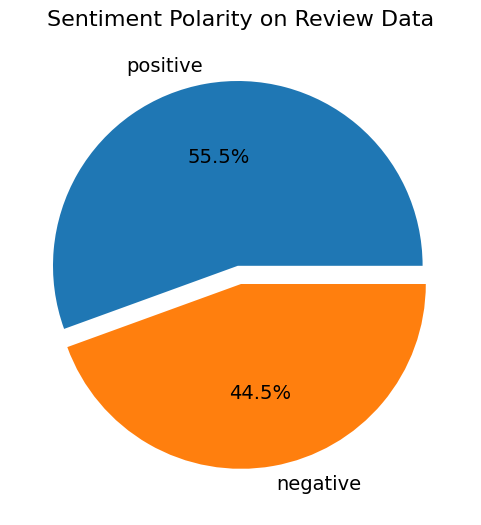

In [15]:
import matplotlib.pyplot as plt

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'clean_df' dan menyimpannya dalam list 'labels'.
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [16]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [17]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
neagtive_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [18]:
list_words = ''
for tweet in negative_tweets['text_stopword']:
  for word in tweet:
    list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

ax.grid(False)

ax.imshow((wordcloud))

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

In [19]:
list_words = ''

for tweet in positive_tweets['text_stopword']:
  for word in tweet:
    list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

ax.grid(False)

ax.imshow((wordcloud))

fig.tight_layout(pad=0)

ax.axis('off')

plt.show()

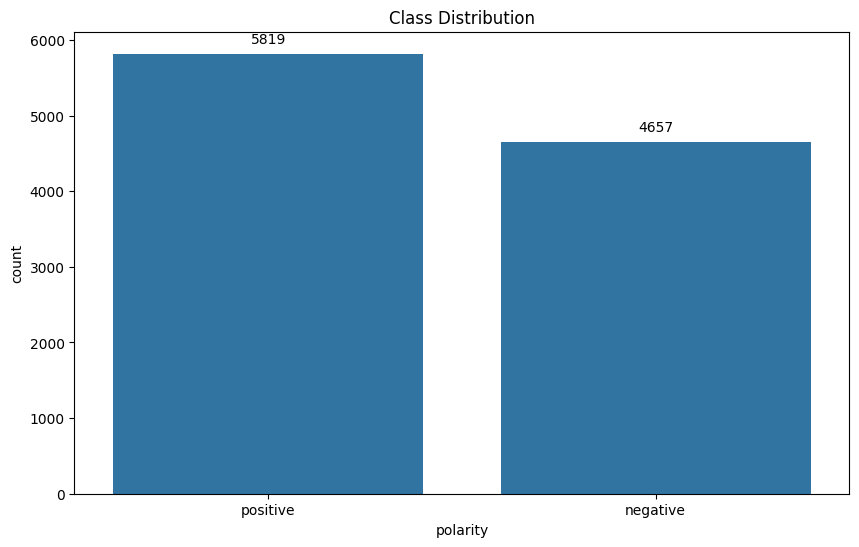

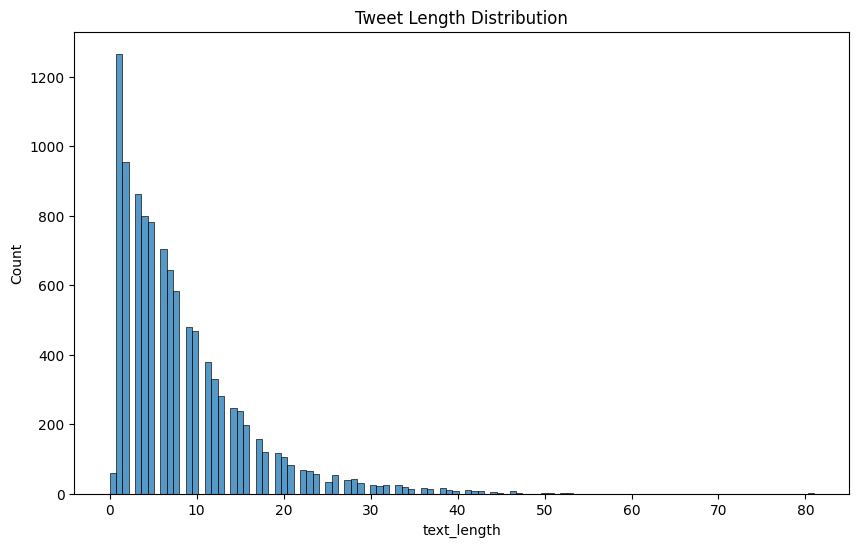

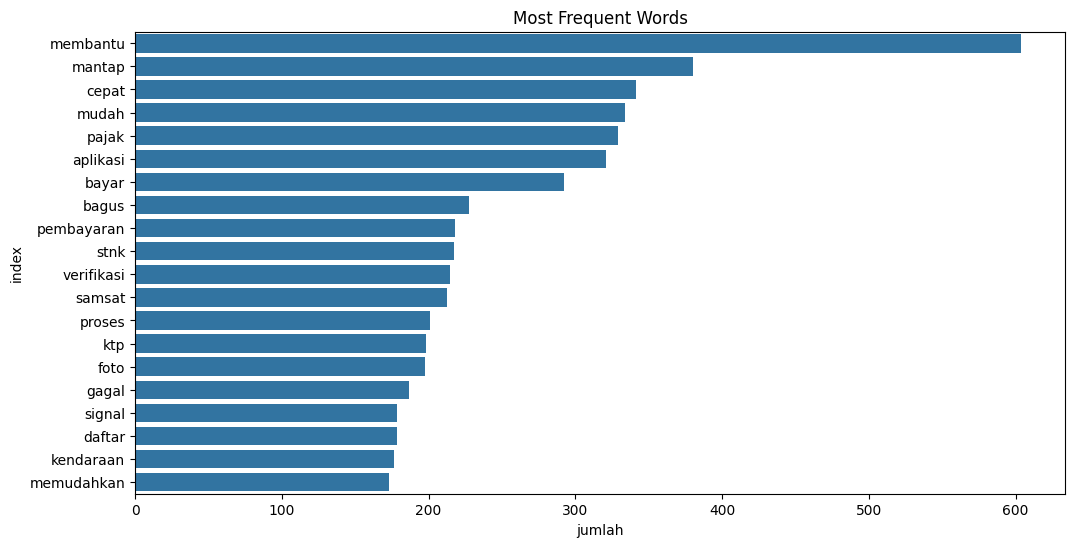

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
  class_dist_plot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0, 10),
                           textcoords = 'offset points')

plt.show()

plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Tweet Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values(by='jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()



In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [22]:
clean_df.head(2)

reviewId         userName  \
20  9576c37a-2503-4bc1-84b2-ec16e0ee878d  Pengguna Google   
56  2744a112-0e5f-4852-9afd-9ae268e40c7b  Pengguna Google   

                                                                                                                   userImage  \
20  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   
56  https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g   

                                                                                                                                                                                                                                                                                                                                                content  \
20          Kendalanya masih sama saat kurir pos Indonesia melakukan pengiriman mereka seperti bingung mencari alamat, karena hanya melihat sedikit alamat didalam amplop STNK, padahal waktu pendaftaran diaplikasi sudah diisi lengkap sampai " saya kasih nomor rumah, tapi masih terkendala cari alamat penerima. Untuk aplikasinya udah oke bagus.   
56  Aplikasi belum sempurna dan perlu disempurnakan lagi, salah satunya sulit utk verifikasi wajah dan selalu gagal utk pilih menu pendaftaran pengesahan STNK. Semoga belum sempurnanya aplikasi ini bukan karena disengaja, karena bagaimanapun juga sistem online seperti ini memang bisa meminimalisir pungli yg tentunya merugikan beberapa OKNUM.   

    score  thumbsUpCount reviewCreatedVersion                   at  \
20      4             87                1.5.7  2024-07-19 12:26:05   
56      2              6                1.5.7  2024-07-24 13:26:42   

                                                                                                                                                                                                                                                                                                                                                    replyContent  \
20    Hai Abdul, kami mohon maaf atas ketidaknyamanannya. Kami akan terus berusaha menjadi lebih baik agar Anda dpt terus menggunakan aplikasi kami dgn puas. Jika ada masalah, jgn ragu utk menghubungi kami melalui CS pd chat di website https://samsatdigital.id dan sertakan ID pengguna atau nama pengguna Playstore Anda. Terima kasih :) #JadiLebihMudah   
56  Hai, kami mohon maaf atas ketidaknyamanannya. Kami akan terus berusaha menjadi lebih baik agar Anda dapat terus menggunakan Aplikasi SIGNAL dengan puas. Jika terdapat kendala, jangan ragu untuk menghubungi Customer Service kami melalui website https://samsatdigital.id atau melalui email kami info@samsatdigital.id. Terima kasih :) #PastiLebihMudah   

              repliedAt appVersion  \
20  2021-08-10 10:59:45      1.5.7   
56  2024-01-03 08:51:22      1.5.7   

                                                                                                                                                                                                                                                                                                                                         text_clean  \
20            Kendalanya masih sama saat kurir pos Indonesia melakukan pengiriman mereka seperti bingung mencari alamat karena hanya melihat sedikit alamat didalam amplop STNK padahal waktu pendaftaran diaplikasi sudah diisi lengkap sampai  saya kasih nomor rumah tapi masih terkendala cari alamat penerima Untuk aplikasinya udah oke bagus   
56  Aplikasi belum sempurna dan perlu disempurnakan lagi salah satunya sulit utk verifikasi wajah dan selalu gagal utk pilih menu pendaftaran pengesahan STNK Semoga belum sempurnanya aplikasi ini bukan karena disengaja karena bagaimanapun juga sistem online seperti ini memang bisa meminimalisir pungli yg tentunya merugikan beberapa OKNUM 

## Data Splitting

In [23]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [24]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [25]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

admin  akun    alamat  alhamdulillah  aman  ambil  antri  apk  \
0        0.0   0.0  0.712170        0.00000   0.0    0.0    0.0  0.0   
1        0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
2        0.0   0.0  0.227061        0.21057   0.0    0.0    0.0  0.0   
3        0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
4        0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
...      ...   ...       ...            ...   ...    ...    ...  ...   
10471    0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
10472    0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
10473    0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
10474    0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   
10475    0.0   0.0  0.000000        0.00000   0.0    0.0    0.0  0.0   

       aplikasi  aplikasinya  ...  trus  tunggu  udh  ulang  update  urus  \
0      0.000000     0.203446  ...   0.0     0.0  0.0    0.0     0.0   0.0   
1      0.328708     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
2      0.124922     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
3      0.295890     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
4      0.271723     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
...         ...          ...  ...   ...     ...  ...    ...     ...   ...   
10471  0.000000     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
10472  0.000000     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
10473  0.000000     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
10474  0.000000     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   
10475  0.000000     0.000000  ...   0.0     0.0  0.0    0.0     0.0   0.0   

       verifikasi  via     wajah  wilayah  
0        0.000000  0.0  0.000000      0.0  
1        0.204839  0.0  0.253966      0.0  
2        0.000000  0.0  0.000000      0.0  
3        0.000000  0.0  0.000000      0.0  
4        0.000000  0.0  0.000000      0.0  
...           ...  ...       ...      ...  
10471    0.000000  0.0  0.000000      0.0  
10472    0.000000  0.0  0.000000      0.0  
10473    0.000000  0.0  0.000000      0.0  
10474    0.000000  0.0  0.000000      0.0  
10475    0.000000  0.0  0.000000      0.0  

[10476 rows x 200 columns]

In [26]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Permodelan

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

Algorithm



1.   Logistic Regression
2.   Support Vector Machine (SVC)
3.   LSTM





In [28]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9174224343675418
Logistic Regression - accuracy_test: 0.9093511450381679


In [29]:
from sklearn.svm import SVC

# Membuat objek model SVM
svm_model = SVC()

# Melatih model SVM pada data pelatihan
svm_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Evaluasi akurasi model SVM pada data pelatihan
accuracy_train_svm = accuracy_score(y_pred_train_svm, y_train)

# Evaluasi akurasi model SVM pada data uji
accuracy_test_svm = accuracy_score(y_pred_test_svm, y_test)

# Menampilkan akurasi
print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9630071599045346
SVM - accuracy_test: 0.9093511450381679


In [75]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Load the GloVe embeddings
def load_glove_embeddings(glove_file, embedding_dim):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

embedding_dim = 100  # Choose the dimension (e.g., 50, 100, 200, 300)
glove_file = 'glove.6B.100d.txt'  # Path to the GloVe file you downloaded
glove_embeddings = load_glove_embeddings(glove_file, embedding_dim)

# Step 2: Tokenize your text data
# Example text data (replace with your actual text data)
texts = ["I love this product!", "This is the worst experience.", "Fantastic service."]
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Step 3: Prepare the embedding matrix
vocab_size = min(10000, len(word_index) + 1)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Words not found in the embeddings will be all zeros

# Step 4: Define the LSTM model with the pre-trained embeddings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size,
                         output_dim=embedding_dim,
                         weights=[embedding_matrix],
                         input_length=100,  # Adjust based on your sequence length
                         trainable=False))  # Set to False to freeze the embedding layer

lstm_model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(units=64)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(units=1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train and evaluate the model
# Example training (replace with your actual data)
X_train = pad_sequences(sequences, maxlen=100)
y_train = np.array([1, 0, 1])  # Example labels

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32)

--2024-09-08 01:23:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-08 01:23:09--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-08 01:23:09--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 100s 100s/step - accuracy: 0.3333 - loss: 0.7062
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 1.0000 - loss: 0.6451
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 1.0000 - loss: 0.6141
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 1.0000 - loss: 0.5914
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 1.0000 - loss: 0.5091
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 1.0000 - loss: 0.5108
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 1.0000 - loss: 0.4182
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 1.0000 - loss: 0.3538
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 1.0000 - loss: 0.3213
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 1.0000 - loss: 0.2940


In [31]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
rf_model = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
rf_model.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Evaluasi akurasi model Random Forest pada data pelatihan
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)

# Evaluasi akurasi model Random Forest pada data uji
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 1.0


In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',  # For binary classification
    'eval_metric': 'error',  # Evaluation metric
    'eta': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of trees
    # Add other parameters as needed
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred_train_xgb = xgb_model.predict(dtrain)
y_pred_test_xgb = xgb_model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_train_xgb_binary = [round(value) for value in y_pred_train_xgb]
y_pred_test_xgb_binary = [round(value) for value in y_pred_test_xgb]

# Evaluate accuracy
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb_binary)
accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb_binary)

# Print accuracy
print('XGBoost - accuracy_train:', accuracy_train_xgb)
print('XGBoost - accuracy_test:', accuracy_test_xgb)

XGBoost - accuracy_train: 0.98125
XGBoost - accuracy_test: 0.98125


## Evaluasi & Inferensi

In [76]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'LSTM Model', 'SVM', 'Random Forest', 'XGBoost'], # Added missing model names
    'Accuracy Train': [accuracy_train_lr, accuracy_train_lstm, accuracy_train_svm, accuracy_train_rf, accuracy_train_xgb], # Removed accuracy_train_svm
    'Accuracy Test': [accuracy_test_lr, accuracy_test_lstm, accuracy_test_svm, accuracy_test_rf, accuracy_test_xgb] # Removed accuracy_test_svm
})

accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0  Logistic Regression       0.909351
1           LSTM Model       1.000000
2                  SVM       0.909351
3        Random Forest       1.000000
4              XGBoost       0.981250


In [77]:
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

print(accuracy_test_sorted)

                 Model  Accuracy Test
1           LSTM Model       1.000000
3        Random Forest       1.000000
4              XGBoost       0.981250
0  Logistic Regression       0.909351
2                  SVM       0.909351


In [80]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Check the shape of X_kalimat_baru
print("Shape of X_kalimat_baru:", X_kalimat_baru.shape)

# Check if X_kalimat_baru is empty
if X_kalimat_baru.shape[0] == 0:
    print("Error: Input data is empty after preprocessing.")
else:
    # Convert the sparse matrix to a dense array
    X_kalimat_baru = X_kalimat_baru.toarray()

    # Reshape X_kalimat_baru for the LSTM model (samples, timesteps, features)
    X_kalimat_baru = X_kalimat_baru.reshape(1, X_kalimat_baru.shape[1], 1)

    # Memperoleh prediksi sentimen kalimat baru
    prediksi_sentimen = lstm_model.predict(X_kalimat_baru)

    # Menampilkan hasil prediksi
    if prediksi_sentimen[0] == 'positive':
        print("Sentimen kalimat baru adalah POSITIF.")
    else:
        print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: jaringan jelek
Shape of X_kalimat_baru: (1, 200)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
Sentimen kalimat baru adalah NEGATIF.


In [61]:
!pip install pipreqs

  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.3/798.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 kB 13.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 3.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=b0f06a3dd4280b5392489faafc88dfb8ab2bd6728812a94ce0d30d8f38b7baba
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Attempting uninstall: mistune
    Found existing installation: mistune 0.8.4
    Uninstalling mistune-0.8.4:
      Successfully uninstalled mistune-0.8.4
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34

In [62]:
!pip install sastrawi==1.0.1
!pip freeze > requirements.txt